# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Set a style for all plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# paths to dataset
train = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')
y_test_data = pd.read_csv('/content/drive/MyDrive/Datasets/sample_submission.csv')

In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Data Analysis and Visualization (Training Set )

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Droping Name and PassengerId Column

In [ ]:
# Features to keep
features = [
    'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
    'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
]

# Prepare DataFrames
train_model = train[features + ['Transported']].copy()
test_model = test[features].copy()

# Dealing with Null Values

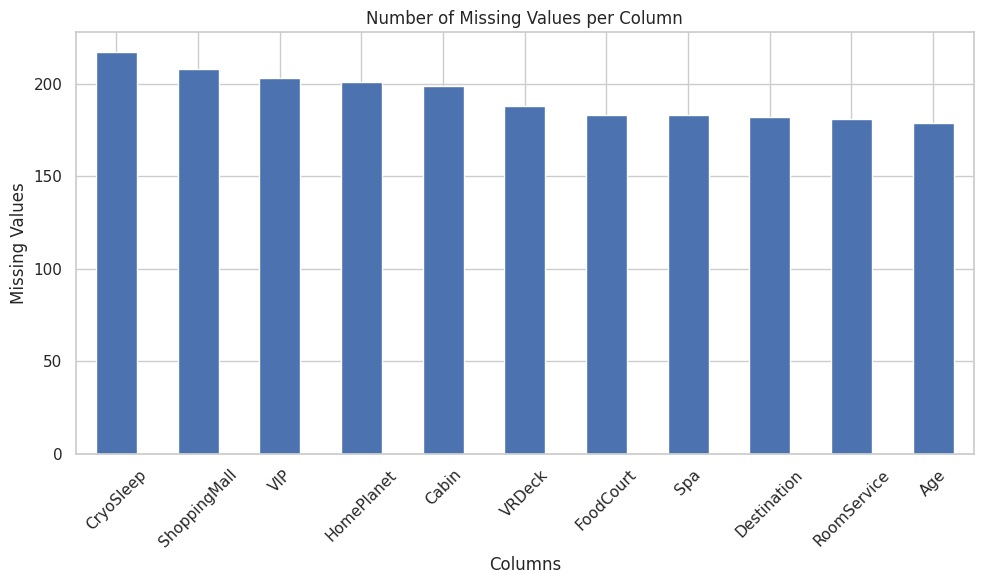

In [ ]:
null_counts = train_model.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Show only columns with missing values

plt.figure(figsize=(10,6))
null_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.ylabel('Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imputing the Missing Values

In [ ]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

# Train set
for col in num_cols:
    median_value = train_model[col].median()
    train_model[col] = train_model[col].fillna(median_value)
for col in cat_cols:
    train_model[col] = train_model[col].astype(str)
    mode_value = train_model[col].mode()[0]
    train_model[col] = train_model[col].replace('nan', mode_value)

# Test set
for col in num_cols:
    median_value = test_model[col].median()
    test_model[col] = test_model[col].fillna(median_value)
for col in cat_cols:
    test_model[col] = test_model[col].astype(str)
    mode_value = test_model[col].mode()[0]
    test_model[col] = test_model[col].replace('nan', mode_value)


# Data Visualization

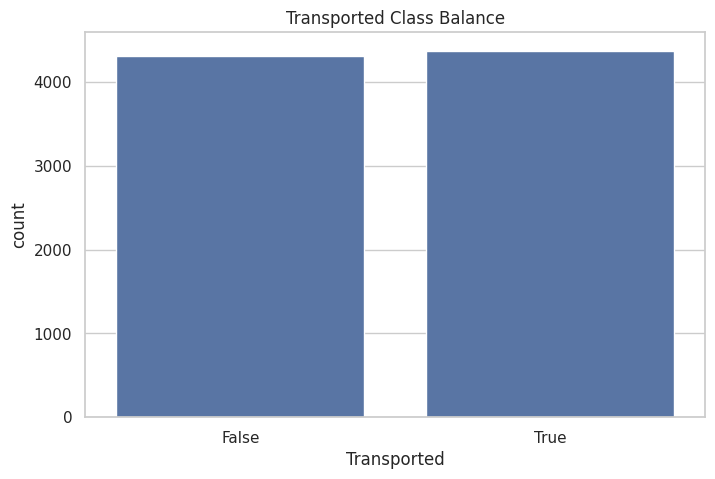

In [ ]:
# Bar Plot: Target Class Balance
sns.countplot(data=train_model, x='Transported')
plt.title('Transported Class Balance')
plt.show()

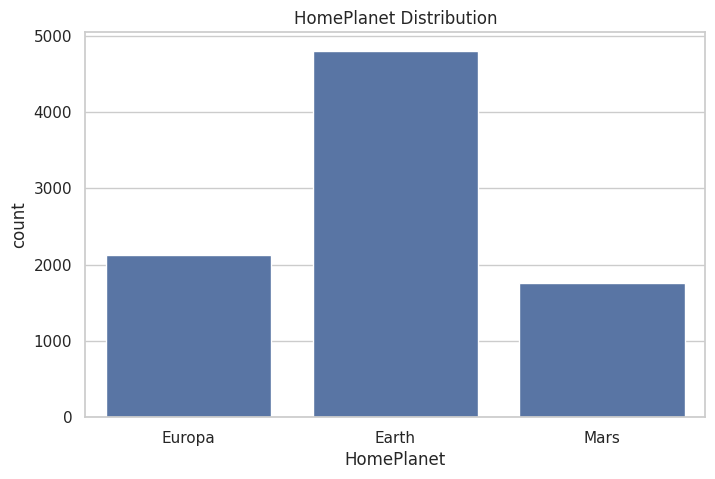

In [ ]:
# Count Plot: HomePlanet Distribution
sns.countplot(data=train_model, x='HomePlanet')
plt.title('HomePlanet Distribution')
plt.show()

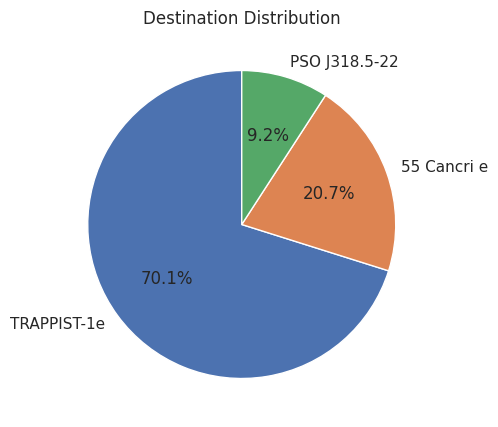

In [ ]:
# Pie Chart: Destination Distribution
train_model['Destination'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Destination Distribution')
plt.ylabel('')
plt.show()

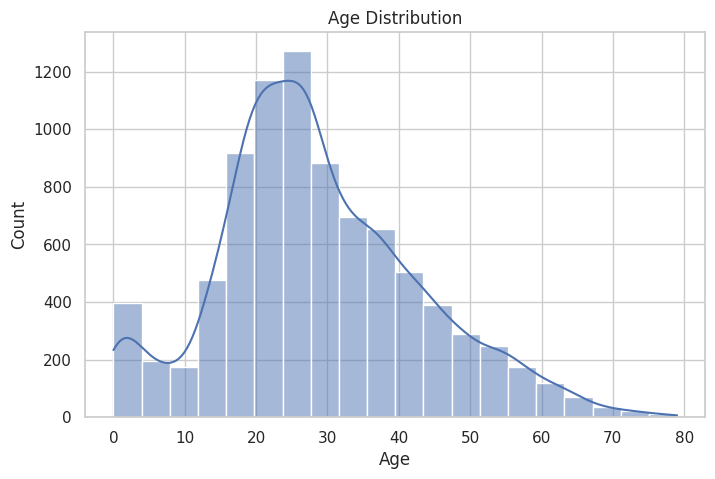

In [ ]:
# Histogram: Age Distribution
sns.histplot(data=train_model, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

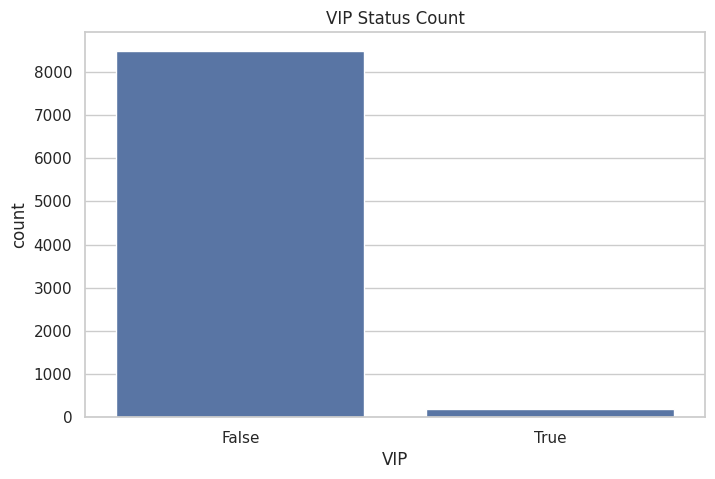

In [ ]:
# Bar Plot: VIP Status Count
sns.countplot(data=train_model, x='VIP')
plt.title('VIP Status Count')
plt.show()

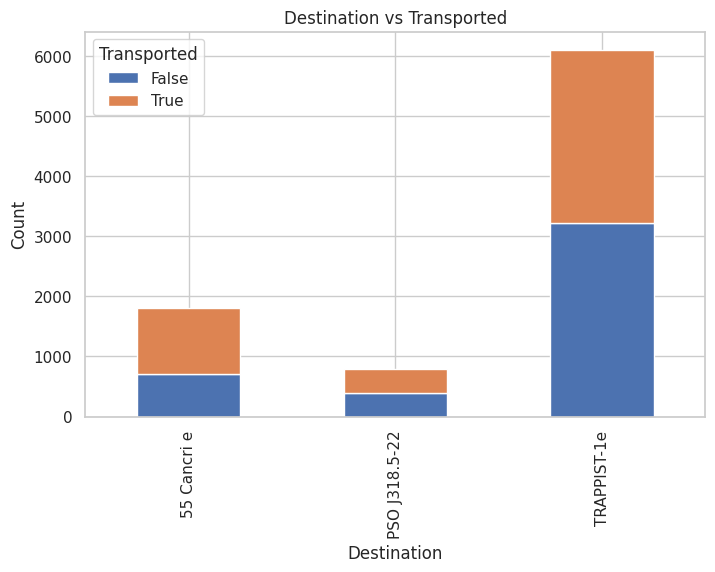

In [ ]:
# Stacked Bar Plot: Destination vs Transported
dest_transported = pd.crosstab(train_model['Destination'], train_model['Transported'])
dest_transported.plot(kind='bar', stacked=True)
plt.title('Destination vs Transported')
plt.ylabel('Count')
plt.show()